<a href="https://colab.research.google.com/github/GDurgaGowri/Predictions_ML/blob/main/Txtclassificationall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.preprocessing import sequence
from keras.datasets import imdb

# Load and preprocess data
max_words = 500
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=1000)
train_x = sequence.pad_sequences(train_x, maxlen=max_words)
test_x = sequence.pad_sequences(test_x, maxlen=max_words)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Flatten, Dropout

# Model parameters
embedding_size = 32
max_words = 500
num_filters = 128
kernel_size = 5
dropout_rate = 0.5

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(1000, embedding_size, input_length=max_words))
model_cnn.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dropout(dropout_rate))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
history_cnn = model_cnn.fit(train_x, train_y, epochs=1, batch_size=500, validation_split=0.2)


40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7133 - loss: 0.5600 - val_accuracy: 0.8272 - val_loss: 0.3934


In [10]:
test_loss, test_accuracy = model_cnn.evaluate(test_x, test_y)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8335 - loss: 0.3807
Test Accuracy: 0.8335199952125549
Test Loss: 0.3846553862094879


In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = (model_cnn.predict(test_x) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

print('Confusion Matrix:')
print(cm)


782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step
Confusion Matrix:
[[10864  1636]
 [ 2526  9974]]


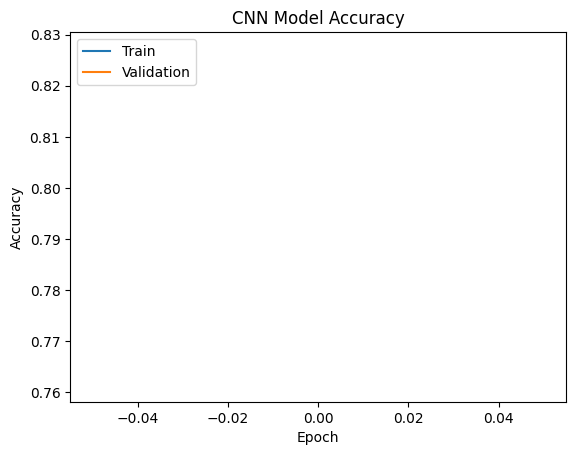

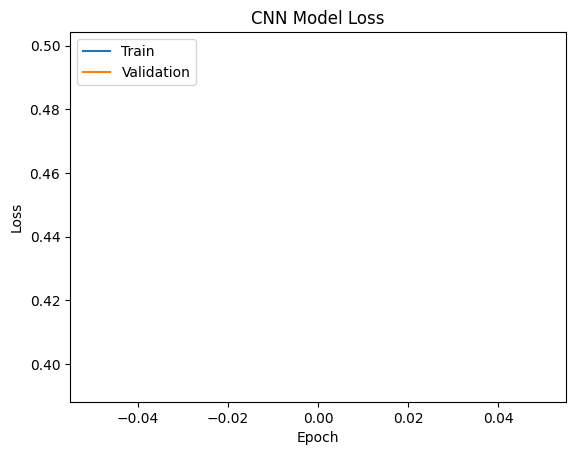

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step


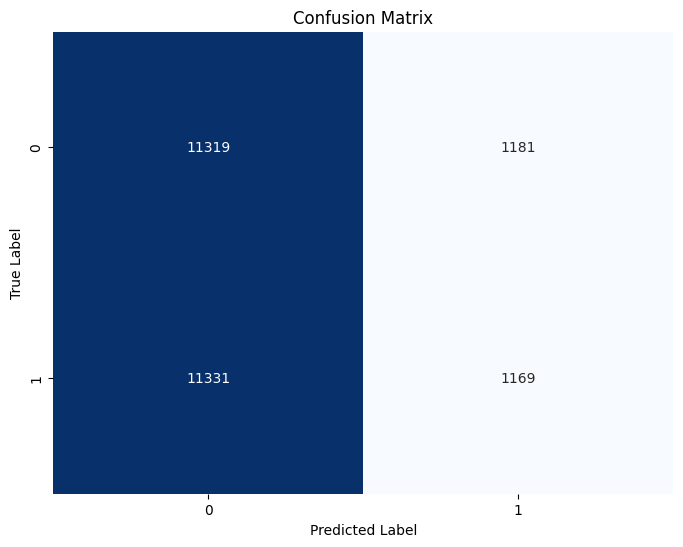

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = (model_cnn.predict(test_x) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(test_y, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [16]:
from tensorflow.keras.layers import LSTM

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(1000, 32, input_length=500))
model_lstm.add(LSTM(100, return_sequences=False))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = model_lstm.fit(train_x, train_y, epochs=1, batch_size=500, validation_split=0.2)

# Evaluate the LSTM model
lstm_eval = model_lstm.evaluate(test_x, test_y)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.5424 - loss: 0.6887 - val_accuracy: 0.6548 - val_loss: 0.6583
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 140ms/step - accuracy: 0.6572 - loss: 0.6581


In [17]:
from tensorflow.keras.layers import GRU

# Define GRU model
model_gru = Sequential()
model_gru.add(Embedding(1000, 32, input_length=500))
model_gru.add(GRU(100, return_sequences=False))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the GRU model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
history_gru = model_gru.fit(train_x, train_y, epochs=1, batch_size=500, validation_split=0.2)

# Evaluate the GRU model
gru_eval = model_gru.evaluate(test_x, test_y)


40/40 ━━━━━━━━━━━━━━━━━━━━ 191s 5s/step - accuracy: 0.5378 - loss: 0.6874 - val_accuracy: 0.6620 - val_loss: 0.6123
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.6592 - loss: 0.6122


In [18]:
# Define DNN model
model_dnn = Sequential()
model_dnn.add(Dense(512, activation='relu', input_shape=(500,)))
model_dnn.add(Dense(256, activation='relu'))
model_dnn.add(Dense(1, activation='sigmoid'))

# Compile the DNN model
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the DNN model
history_dnn = model_dnn.fit(train_x, train_y, epochs=1, batch_size=500, validation_split=0.2)

# Evaluate the DNN model
dnn_eval = model_dnn.evaluate(test_x, test_y)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.5038 - loss: 45.6769 - val_accuracy: 0.5100 - val_loss: 6.5100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5106 - loss: 6.3419


782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step


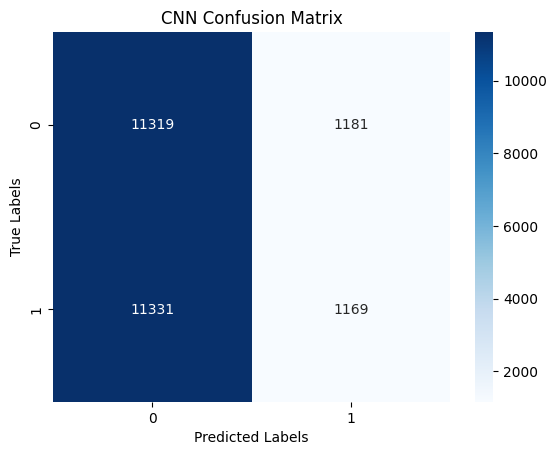

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions for CNN model
y_pred_cnn = (model_cnn.predict(test_x) > 0.5).astype(int)

# Generate confusion matrix for CNN
cm_cnn = confusion_matrix(test_y, y_pred_cnn)

# Plot the confusion matrix using Seaborn's heatmap
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step


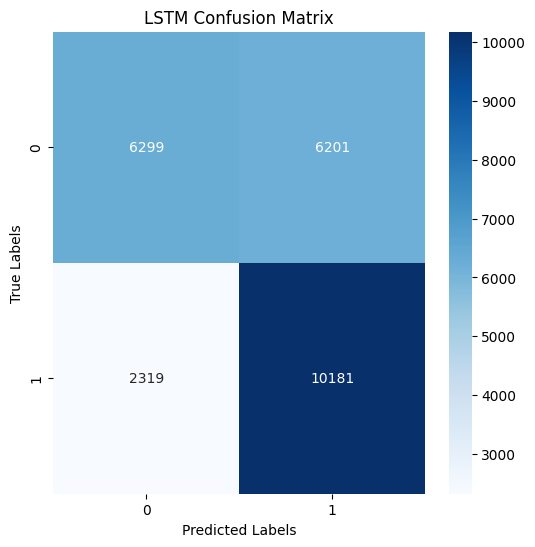

In [25]:

# Confusion Matrix for LSTM
y_pred_lstm = (model_lstm.predict(test_x) > 0.5).astype(int)
cm_lstm = confusion_matrix(test_y, y_pred_lstm)
plt.figure(figsize=(6,6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step


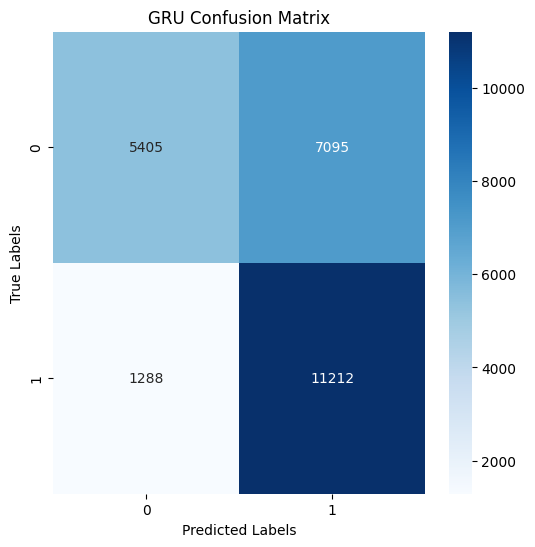

In [26]:
# Confusion Matrix for GRU
y_pred_gru = (model_gru.predict(test_x) > 0.5).astype(int)
cm_gru = confusion_matrix(test_y, y_pred_gru)
plt.figure(figsize=(6,6))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues')
plt.title('GRU Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


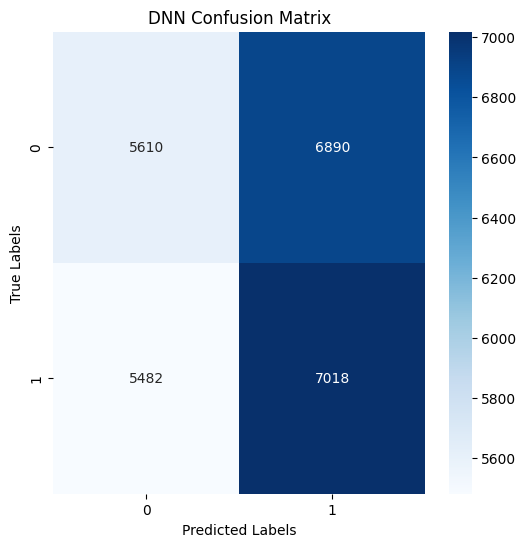

In [27]:

# Confusion Matrix for DNN
y_pred_dnn = (model_dnn.predict(test_x) > 0.5).astype(int)
cm_dnn = confusion_matrix(test_y, y_pred_dnn)
plt.figure(figsize=(6,6))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues')
plt.title('DNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [28]:
# Dictionary to store evaluation results
model_performance = {

    'LSTM': lstm_eval,
    'GRU': gru_eval,
    'DNN': dnn_eval
}

# Print the performance comparison
for model_name, performance in model_performance.items():
    print(f"{model_name} - Accuracy: {performance[1]:.4f}, Loss: {performance[0]:.4f}")


LSTM - Accuracy: 0.6592, Loss: 0.6574
GRU - Accuracy: 0.6647, Loss: 0.6092
DNN - Accuracy: 0.5051, Loss: 2.9733


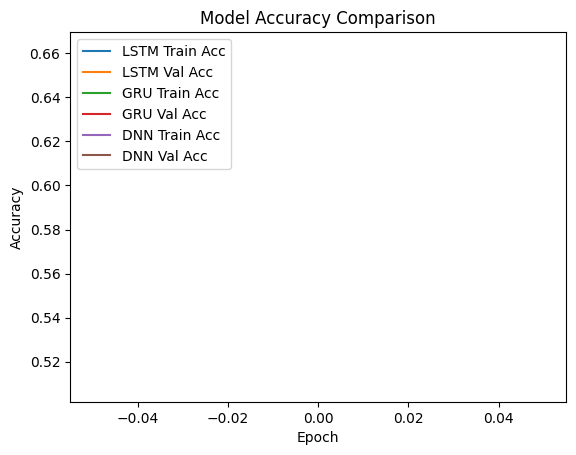

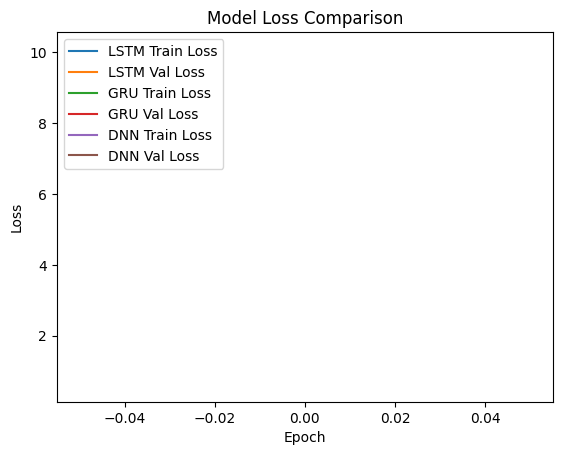

In [29]:
# Plot training and validation accuracy for each model
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Acc')
plt.plot(history_gru.history['accuracy'], label='GRU Train Acc')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val Acc')

plt.plot(history_dnn.history['accuracy'], label='DNN Train Acc')
plt.plot(history_dnn.history['val_accuracy'], label='DNN Val Acc')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Val Loss')
plt.plot(history_dnn.history['loss'], label='DNN Train Loss')
plt.plot(history_dnn.history['val_loss'], label='DNN Val Loss')

plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()


In [31]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, Dense
from tensorflow.keras.models import Sequential

# Define CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(1000, 32, input_length=500))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = model_cnn.fit(train_x, train_y, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the CNN model
cnn_eval = model_cnn.evaluate(test_x, test_y)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 315ms/step - accuracy: 0.5584 - loss: 0.6704 - val_accuracy: 0.8012 - val_loss: 0.4454
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 286ms/step - accuracy: 0.8200 - loss: 0.4046 - val_accuracy: 0.8436 - val_loss: 0.3500
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 297ms/step - accuracy: 0.8706 - loss: 0.3032 - val_accuracy: 0.8668 - val_loss: 0.3132
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 284ms/step - accuracy: 0.8981 - loss: 0.2558 - val_accuracy: 0.8674 - val_loss: 0.3130
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 281ms/step - accuracy: 0.9111 - loss: 0.2241 - val_accuracy: 0.8712 - val_loss: 0.3011
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8687 - loss: 0.3149


782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step


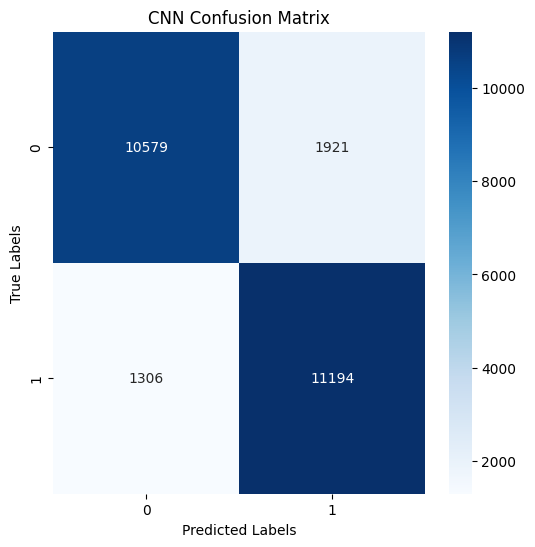

In [32]:
y_pred_cnn = (model_cnn.predict(test_x) > 0.5).astype(int)
cm_cnn = confusion_matrix(test_y, y_pred_cnn)
plt.figure(figsize=(6,6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

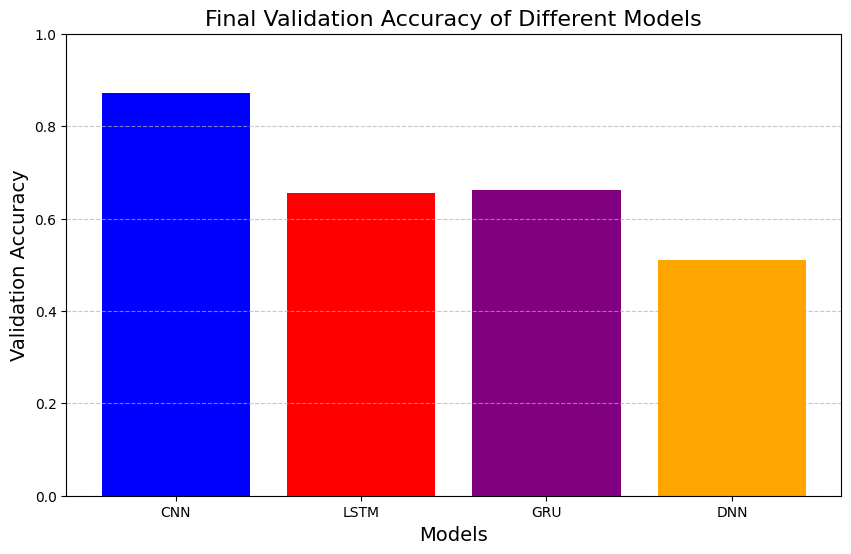

In [33]:
import matplotlib.pyplot as plt

# Assuming you have trained these models and stored their final validation accuracies
# Replace these dummy values with your actual final accuracies
cnn_accuracy = history_cnn.history['val_accuracy'][-1]  # CNN final val accuracy
lstm_accuracy = history_lstm.history['val_accuracy'][-1]  # LSTM final val accuracy
gru_accuracy = history_gru.history['val_accuracy'][-1]  # GRU final val accuracy
dnn_accuracy = history_dnn.history['val_accuracy'][-1]  # DNN final val accuracy

# Model names
models = ['CNN', 'LSTM', 'GRU', 'DNN']

# Final validation accuracies
accuracies = [cnn_accuracy, lstm_accuracy, gru_accuracy, dnn_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'red', 'purple', 'orange'])

# Adding titles and labels
plt.title('Final Validation Accuracy of Different Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)

# Display the final plot
plt.ylim([0, 1])  # Accuracy is between 0 and 1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()
